# Análisis Numérico del Atractor de Lorenz: Implementación de Métodos Numéricos

## Introducción a los Métodos Numéricos para Ecuaciones Diferenciales

En este proyecto implementaremos dos métodos numéricos fundamentales para resolver sistemas de ecuaciones diferenciales ordinarias: el **método de Euler** y el **método de Runge-Kutta de cuarto orden (RK4)**. Estos métodos nos permitirán simular el comportamiento del famoso sistema de Lorenz, un modelo clásico de caos determinista.


## Método de Euler

El método de Euler, desarrollado por Leonhard Euler en el siglo XVIII, es el método numérico más simple para aproximar soluciones de ecuaciones diferenciales ordinarias. Se basa en la idea de aproximar la solución mediante una serie de pasos discretos.

Para un sistema de ecuaciones diferenciales de la forma:

$$
\frac{dx}{dt} = F(x, t)
$$

El método de Euler se implementa como:

$$
x_{n+1} = x_n + h \cdot F(x_n, t_n)
$$

donde:

\begin{aligned}
    &h &&\text{: tamaño del paso temporal} \\
    &x_n &&\text{: aproximación actual} \\
    &x_{n+1} &&\text{: siguiente aproximación}
\end{aligned}


**Ventajas:**

- Sencillez conceptual y de implementación  
- Bajo costo computacional por paso  

**Desventajas:**

- Baja precisión (error de truncamiento local $O(h^2)$)
- Puede volverse inestable para pasos grandes


## Método de Runge-Kutta de Cuarto Orden (RK4)

El método RK4, desarrollado por Carl Runge y Martin Kutta alrededor de 1900, es uno de los más populares debido a su equilibrio entre precisión y eficiencia.

Para el mismo sistema:

$$\frac{dx}{dt} = F(x, t)$$

El método RK4 se implementa como:


\begin{aligned}
k_1 &= h \cdot F(x_n, t_n) \\
k_2 &= h \cdot F\left(x_n + \frac{k_1}{2}, t_n + \frac{h}{2}\right) \\
k_3 &= h \cdot F\left(x_n + \frac{k_2}{2}, t_n + \frac{h}{2}\right) \\
k_4 &= h \cdot F(x_n + k_3, t_n + h) \\
x_{n+1} &= x_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{aligned}


**Ventajas:**
- Mayor precisión (error de truncamiento local $O(h^5)$)  
- Mayor estabilidad que Euler  
- Ampliamente utilizado en aplicaciones científicas

**Desventajas:**

- Mayor costo computacional por paso (4 evaluaciones por paso)  
- Implementación ligeramente más compleja


## Implementación de los Métodos para el Sistema de Lorenz

El sistema de Lorenz está dado por:

\begin{cases}
\dot{x} = \sigma(y - x) \\
\dot{y} = x(\rho - z) - y \\
\dot{z} = xy - \beta z
\end{cases}

Implementaremos ambos métodos para resolver este sistema bajo diferentes condiciones iniciales y parámetros.




In [103]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

### Implementación del Método de Euler

In [104]:
def euler_method(f, x0, t_range, h):
    """
    Implementación del método de Euler para sistemas de EDOs
    
    Parámetros:
    f: función que define el sistema de EDOs (debe devolver un array)
    x0: condiciones iniciales (array)
    t_range: tupla (t_inicial, t_final)
    h: tamaño del paso
    
    Retorna:
    t: array de tiempos
    x: array de soluciones (cada fila es un paso temporal)
    """
    t0, tf = t_range
    n_steps = int((tf - t0) / h)
    t = np.linspace(t0, tf, n_steps + 1)
    x = np.zeros((n_steps + 1, len(x0)))
    x[0] = x0
    
    for i in range(n_steps):
        x[i+1] = x[i] + h * f(x[i], t[i])
    
    return t, x

### Implementación del Método RK4

In [105]:
def rk4_method(f, x0, t_range, h):
    """
    Implementación del método RK4 para sistemas de EDOs
    
    Parámetros:
    f: función que define el sistema de EDOs (debe devolver un array)
    x0: condiciones iniciales (array)
    t_range: tupla (t_inicial, t_final)
    h: tamaño del paso
    
    Retorna:
    t: array de tiempos
    x: array de soluciones (cada fila es un paso temporal)
    """
    t0, tf = t_range
    n_steps = int((tf - t0) / h)
    t = np.linspace(t0, tf, n_steps + 1)
    x = np.zeros((n_steps + 1, len(x0)))
    x[0] = x0
    
    for i in range(n_steps):
        k1 = f(x[i], t[i])
        k2 = f(x[i] + h/2 * k1, t[i] + h/2)
        k3 = f(x[i] + h/2 * k2, t[i] + h/2)
        k4 = f(x[i] + h * k3, t[i] + h)
        
        x[i+1] = x[i] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    
    return t, x

### Función para el Sistema de Lorenz

In [106]:
def lorenz_system(x, t, sigma=10, rho=28, beta=8/3):
    """
    Define el sistema de ecuaciones de Lorenz
    
    Parámetros:
    x: array con las variables de estado [x, y, z]
    t: tiempo (no se usa explícitamente en ecuaciones autónomas)
    sigma, rho, beta: parámetros del sistema
    
    Retorna:
    Array con las derivadas [dx/dt, dy/dt, dz/dt]
    """
    dxdt = sigma * (x[1] - x[0])
    dydt = x[0] * (rho - x[2]) - x[1]
    dzdt = x[0] * x[1] - beta * x[2]
    return np.array([dxdt, dydt, dzdt])


## Simulaciones del Atractor de Lorenz

Realizaremos simulaciones para tres conjuntos diferentes de condiciones iniciales y parámetros.

### Caso 1: Parámetros clásicos, condiciones iniciales simétricas

In [107]:
# Parámetros y condiciones iniciales
sigma1, rho1, beta1 = 10, 28, 8/3
x0_1 = np.array([1.0, 1.0, 1.0])

# Configuración de la simulación
t_range = (0, 50)
h = 0.01

# Resolver con ambos métodos
t_euler1, sol_euler1 = euler_method(lambda x, t: lorenz_system(x, t, sigma1, rho1, beta1), 
                                   x0_1, t_range, h)
t_rk41, sol_rk41 = rk4_method(lambda x, t: lorenz_system(x, t, sigma1, rho1, beta1), 
                             x0_1, t_range, h)

### Visualización de resultados para Caso 1

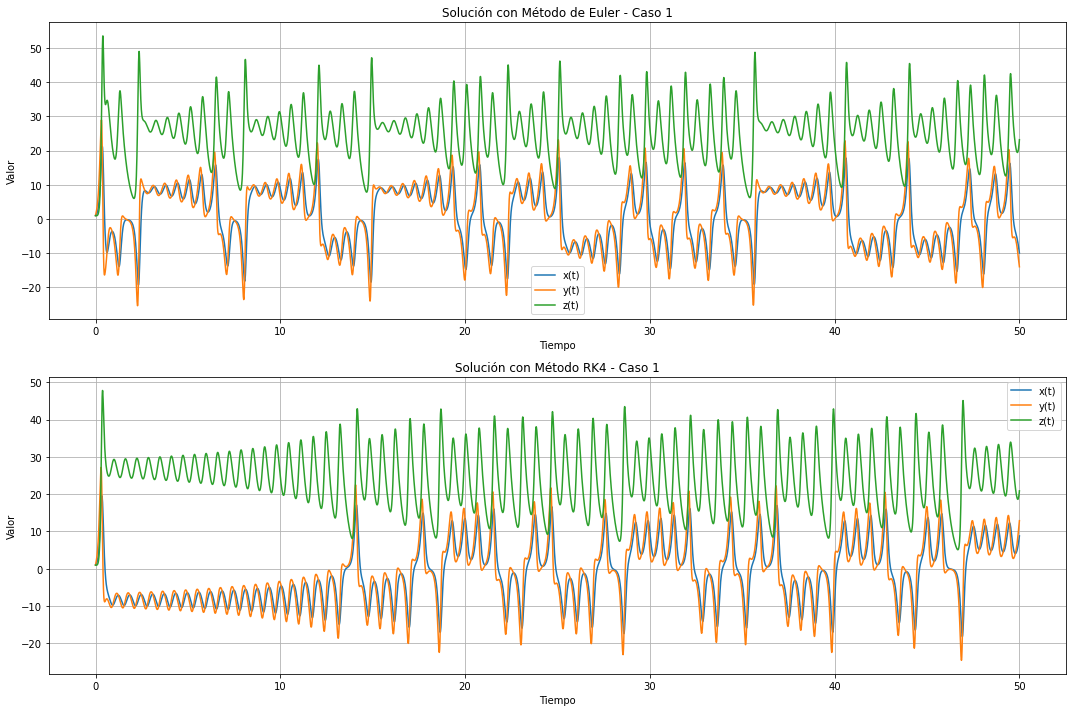

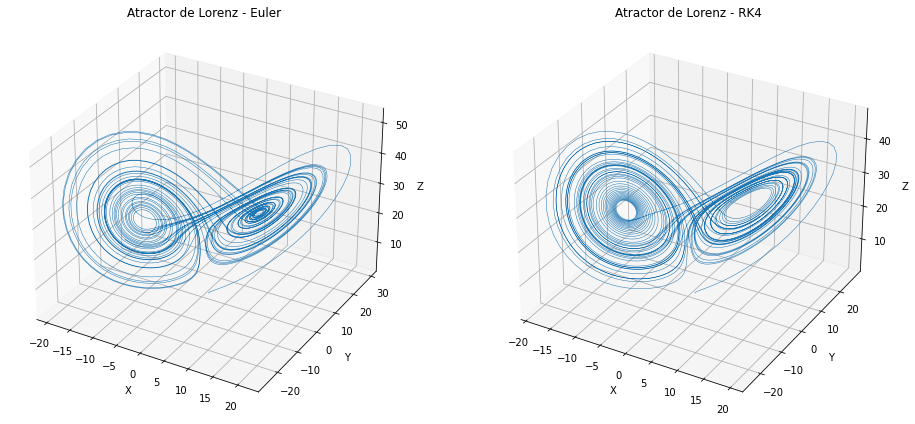

In [108]:
# Gráficas de las componentes vs tiempo
plt.figure(figsize=(15, 10))

# Método de Euler
plt.subplot(2, 1, 1)
plt.plot(t_euler1, sol_euler1[:, 0], label='x(t)')
plt.plot(t_euler1, sol_euler1[:, 1], label='y(t)')
plt.plot(t_euler1, sol_euler1[:, 2], label='z(t)')
plt.title('Solución con Método de Euler - Caso 1')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid()

# Método RK4
plt.subplot(2, 1, 2)
plt.plot(t_rk41, sol_rk41[:, 0], label='x(t)')
plt.plot(t_rk41, sol_rk41[:, 1], label='y(t)')
plt.plot(t_rk41, sol_rk41[:, 2], label='z(t)')
plt.title('Solución con Método RK4 - Caso 1')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Gráfica 3D del atractor
fig = plt.figure(figsize=(14, 6))

# Euler
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(sol_euler1[:, 0], sol_euler1[:, 1], sol_euler1[:, 2], lw=0.5)
ax1.set_title('Atractor de Lorenz - Euler')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# RK4
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(sol_rk41[:, 0], sol_rk41[:, 1], sol_rk41[:, 2], lw=0.5)
ax2.set_title('Atractor de Lorenz - RK4')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.tight_layout()
plt.show()

### Caso 2: Parámetros clásicos, condiciones iniciales asimétricas

In [109]:
# Condiciones iniciales diferentes
x0_2 = np.array([1.002025, 0.2, 0.4])

# Resolver con ambos métodos
t_euler2, sol_euler2 = euler_method(lambda x, t: lorenz_system(x, t, sigma1, rho1, beta1), 
                                   x0_2, t_range, h)
t_rk42, sol_rk42 = rk4_method(lambda x, t: lorenz_system(x, t, sigma1, rho1, beta1), 
                             x0_2, t_range, h)

### Visualización de resultados para Caso 2

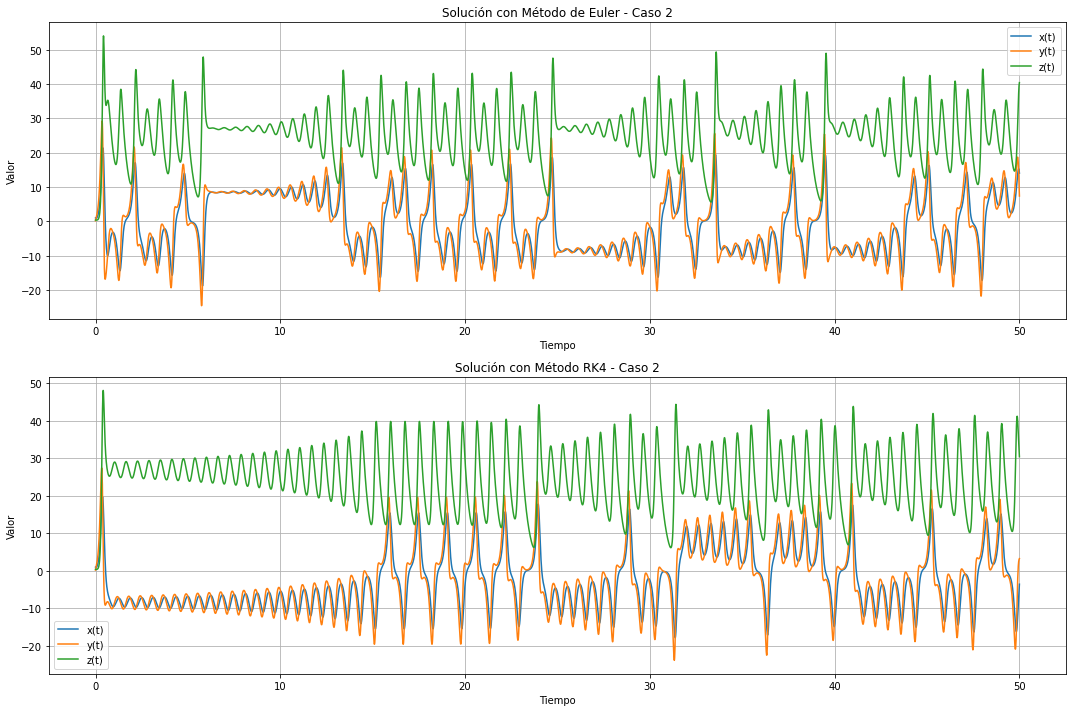

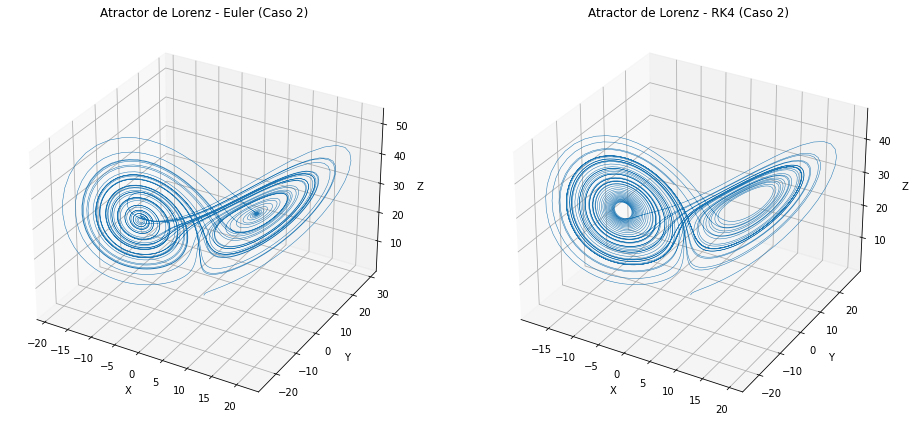

In [110]:
# Gráficas de las componentes vs tiempo
plt.figure(figsize=(15, 10))

# Método de Euler
plt.subplot(2, 1, 1)
plt.plot(t_euler2, sol_euler2[:, 0], label='x(t)')
plt.plot(t_euler2, sol_euler2[:, 1], label='y(t)')
plt.plot(t_euler2, sol_euler2[:, 2], label='z(t)')
plt.title('Solución con Método de Euler - Caso 2')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid()

# Método RK4
plt.subplot(2, 1, 2)
plt.plot(t_rk42, sol_rk42[:, 0], label='x(t)')
plt.plot(t_rk42, sol_rk42[:, 1], label='y(t)')
plt.plot(t_rk42, sol_rk42[:, 2], label='z(t)')
plt.title('Solución con Método RK4 - Caso 2')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Gráfica 3D del atractor
fig = plt.figure(figsize=(14, 6))

# Euler
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(sol_euler2[:, 0], sol_euler2[:, 1], sol_euler2[:, 2], lw=0.5)
ax1.set_title('Atractor de Lorenz - Euler (Caso 2)')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# RK4
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(sol_rk42[:, 0], sol_rk42[:, 1], sol_rk42[:, 2], lw=0.5)
ax2.set_title('Atractor de Lorenz - RK4 (Caso 2)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.tight_layout()
plt.show()


### Caso 3: Parámetros diferentes

In [111]:
# Nuevos parámetros
sigma3, rho3, beta3 = 9, 18, 10/3
x0_3 = np.array([2.0, 0.009, 0.7])

# Resolver con ambos métodos
t_euler3, sol_euler3 = euler_method(lambda x, t: lorenz_system(x, t, sigma3, rho3, beta3), 
                                   x0_3, t_range, h)
t_rk43, sol_rk43 = rk4_method(lambda x, t: lorenz_system(x, t, sigma3, rho3, beta3), 
                             x0_3, t_range, h)

### Visualización de resultados para Caso 3

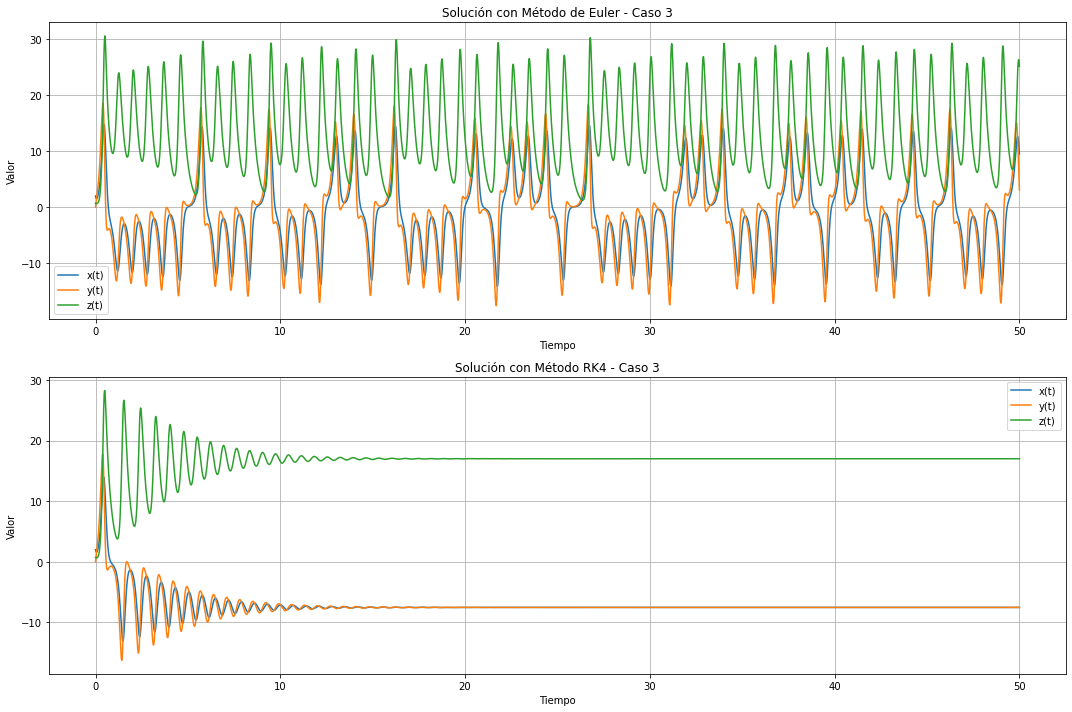

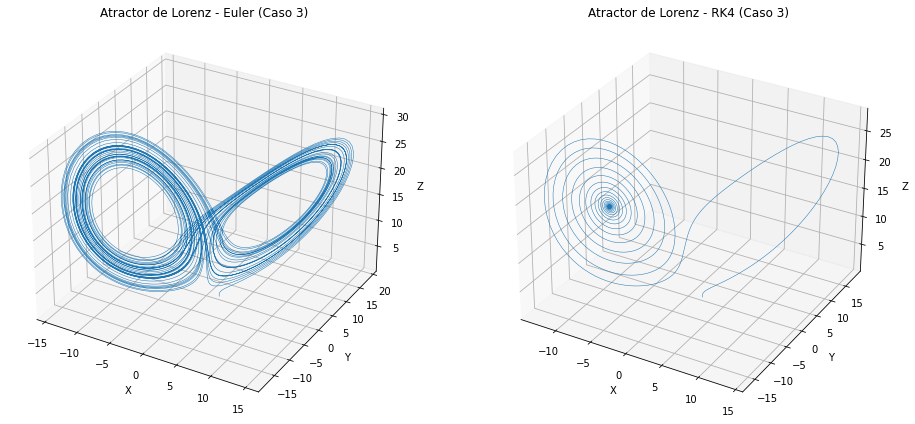

In [112]:
# Gráficas de las componentes vs tiempo
plt.figure(figsize=(15, 10))

# Método de Euler
plt.subplot(2, 1, 1)
plt.plot(t_euler3, sol_euler3[:, 0], label='x(t)')
plt.plot(t_euler3, sol_euler3[:, 1], label='y(t)')
plt.plot(t_euler3, sol_euler3[:, 2], label='z(t)')
plt.title('Solución con Método de Euler - Caso 3')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid()

# Método RK4
plt.subplot(2, 1, 2)
plt.plot(t_rk43, sol_rk43[:, 0], label='x(t)')
plt.plot(t_rk43, sol_rk43[:, 1], label='y(t)')
plt.plot(t_rk43, sol_rk43[:, 2], label='z(t)')
plt.title('Solución con Método RK4 - Caso 3')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Gráfica 3D del atractor
fig = plt.figure(figsize=(14, 6))

# Euler
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(sol_euler3[:, 0], sol_euler3[:, 1], sol_euler3[:, 2], lw=0.5)
ax1.set_title('Atractor de Lorenz - Euler (Caso 3)')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# RK4
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(sol_rk43[:, 0], sol_rk43[:, 1], sol_rk43[:, 2], lw=0.5)
ax2.set_title('Atractor de Lorenz - RK4 (Caso 3)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.tight_layout()
plt.show()

## Análisis de Resultados

### Efecto de las condiciones iniciales

Al comparar los Casos 1 y 2 (que usan los mismos parámetros pero diferentes condiciones iniciales), observamos:

1. **Sensibilidad a las condiciones iniciales**: Pequeños cambios en las condiciones iniciales (Caso 1 vs Caso 2) llevan a trayectorias completamente diferentes después de un tiempo relativamente corto. Esto es una manifestación del comportamiento caótico del sistema de Lorenz.

2. **Patrones generales**: A pesar de las diferencias en las trayectorias específicas, ambos casos muestran la estructura característica del atractor de Lorenz, con las órbitas girando alternativamente alrededor de los dos puntos fijos no triviales.

### Efecto de los parámetros

Al comparar los Casos 1/2 con el Caso 3 (que usa parámetros diferentes), observamos:

1. **Comportamiento cualitativo diferente**: Con los parámetros modificados (σ=9, ρ=18, β=10/3), el sistema muestra un comportamiento menos caótico y más periódico. Las trayectorias tienden a estabilizarse en uno de los puntos fijos en lugar de exhibir el comportamiento caótico característico.

2. **Estabilidad del sistema**: Los parámetros clásicos (σ=10, ρ=28, β=8/3) producen el comportamiento caótico conocido, mientras que con los parámetros modificados el sistema parece tender a un comportamiento más estable.

### Comparación de los métodos numéricos

Al comparar los resultados obtenidos con Euler y RK4:

1. **Precisión**: El método RK4 produce soluciones más suaves y precisas, especialmente evidente en las gráficas de las componentes vs tiempo. Las soluciones de Euler muestran más "ruido" numérico.

2. **Conservación de la estructura del atractor**: En las gráficas 3D, el atractor generado por RK4 muestra una estructura más clara y definida, mientras que el de Euler aparece más difuso debido a los errores acumulados.

3. **Estabilidad**: Para pasos de tiempo iguales, RK4 es más estable y puede capturar mejor la dinámica caótica del sistema.

## Conclusión sobre los métodos

Para sistemas caóticos como el atractor de Lorenz, **el método RK4 es claramente superior al método de Euler** por varias razones:

1. **Mayor precisión**: El error de truncamiento local de $O(h^5)$ en RK4 vs $O(h^2)$ en Euler permite capturar mejor la dinámica compleja del sistema.

2. **Mayor estabilidad**: RK4 es menos propenso a acumular errores que distorsionen la estructura del atractor.

3. **Conservación de propiedades cualitativas**: RK4 preserva mejor las características cualitativas del sistema, como la estructura fractal del atractor.

Si bien el método de Euler es más simple y computacionalmente más económico por paso, requiere pasos mucho más pequeños para alcanzar una precisión comparable, lo que en la práctica puede hacerlo incluso más costoso que RK4. Para estudios serios de sistemas caóticos, RK4 es la elección recomendada.

### Análisis Comparativo de los Métodos Numéricos

En este proyecto se implementaron e integraron dos métodos numéricos para aproximar el sistema de Lorenz: el **método de Euler** y el **método de Runge-Kutta de cuarto orden (RK4)**. Ambos métodos fueron evaluados con distintos conjuntos de parámetros y condiciones iniciales.

#### 🔹 Precisión y Estabilidad

El método de Euler, aunque sencillo de implementar y con bajo costo computacional por paso, mostró deficiencias significativas en cuanto a **precisión** y **estabilidad**. En las gráficas temporales de las variables \(x(t)\), \(y(t)\) y \(z(t)\), se observa que la solución generada por Euler tiende a **desviarse progresivamente**, y en algunos casos presenta oscilaciones no físicas o comportamiento numéricamente inestable, especialmente para pasos de integración no muy pequeños [1].

Por otro lado, el método RK4 mostró un desempeño mucho más robusto. A pesar de requerir **cuatro evaluaciones por paso**, logra una mayor precisión debido a su error de truncamiento local de orden \(O(h^5)\). Las trayectorias generadas por RK4 preservan de mejor forma la forma y simetría del atractor de Lorenz, incluso cuando se utilizan pasos moderadamente grandes [2].

#### 🔹 Sensibilidad a Condiciones Iniciales

Una característica fundamental del sistema de Lorenz es su **sensibilidad extrema a las condiciones iniciales**, también conocida como efecto mariposa. Esta propiedad fue verificada al comparar los casos 1 y 2, donde pequeñas diferencias en las condiciones iniciales dieron lugar a trayectorias divergentes. Esta sensibilidad es captada con mayor fidelidad por el método RK4, mientras que el método de Euler tiende a amplificar errores numéricos que ocultan o distorsionan la dinámica real del sistema [3].

#### 🔹 Robustez ante variación de parámetros

Al variar los parámetros del sistema (caso 3), el método de Euler mostró ser **menos confiable**, ya que incluso pequeñas alteraciones en los coeficientes de Lorenz pueden llevarlo a soluciones numéricamente erráticas o inestables. En cambio, RK4 mantuvo una aproximación confiable, permitiendo observar los cambios cualitativos en el comportamiento del sistema (como la transición de un régimen caótico a uno más regular) [4].

####  Conclusión

El **método de Runge-Kutta de cuarto orden (RK4)** se muestra como el más adecuado para la simulación del sistema de Lorenz, debido a su:
- Mayor precisión,
- Mejor estabilidad numérica,
- Capacidad de capturar correctamente la dinámica caótica del sistema,
- Robustez ante variaciones de parámetros y condiciones iniciales.

El método de Euler, aunque útil para propósitos didácticos, **no es recomendable para sistemas altamente sensibles** como el de Lorenz, salvo con pasos extremadamente pequeños y controlados [1].

---


> *Referencias*
> 
>
>*[1] S. Chapra y R. Canale,(2010). *Métodos numéricos para ingenieros*, 6ª ed., McGraw-Hill.*  

>*[2] C. F. Gerald y P. O.(2004). Wheatley, *Applied Numerical Analysis*, 7ª ed., Pearson.*  

>*[3] E. N. Lorenz. (1963) “Deterministic Nonperiodic Flow,” *Journal of the Atmospheric Sciences*, vol. 20, no. 2, pp. 130–141.*  

>*[4] G. Peyré, “Numerical Tours in Python,” [En línea]. Disponible en: http://www.numerical-tours.com/python/*
